In [31]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/k1762355/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
import pickle
def load_dict(name):
        with open('dict-' + name + '.pkl', 'rb') as f:
                return pickle.load(f)
fire=load_dict("fire")

(array([  8.84000000e+02,   1.16900000e+03,   1.00740000e+04,
          3.65000000e+02,   3.05000000e+02,   2.30220000e+04,
          2.69000000e+02,   3.21200000e+03,   1.28000000e+02,
          1.12000000e+02,   1.30770000e+04,   1.63000000e+02,
          3.00000000e+01,   1.30400000e+03,   9.20000000e+01,
          6.93800000e+03,   1.07000000e+02,   5.70000000e+01,
          6.10000000e+02,   5.20000000e+01,   6.40300000e+03,
          6.00000000e+01,   3.30000000e+01,   3.02000000e+02,
          4.90000000e+01,   1.90000000e+01,   3.11100000e+03,
          4.40000000e+01,   1.92000000e+02,   1.80000000e+01,
          3.10000000e+01,   1.76800000e+03,   2.60000000e+01,
          1.65000000e+02,   1.60000000e+01,   2.60000000e+01,
          1.92900000e+03,   2.30000000e+01,   1.20000000e+01,
          1.22000000e+02,   2.20000000e+01,   6.81000000e+02,
          1.90000000e+01,   2.10000000e+01,   9.90000000e+01,
          1.70000000e+01,   8.00000000e+00,   0.00000000e+00,
        

In [111]:
len(fire["Country"])
len(titles)


29

In [5]:
fire["tot_burnt"]

(array([  4.53504000e+05,   4.40000000e+01,   1.50000000e+01,
          5.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e-06,   3.60190000e+03,   7.20380000e+03,
          1.08057000e+04,   1.44076000e+04,   1.80095000e+04,
          2.16114000e+04,   2.52133000e+04,   2.88152000e+04,
          3.24171000e+04,   3.60190000e+04]),
 <a list of 10 Patch objects>)

(0, 0.16624134380711544)

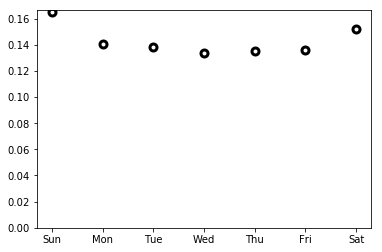

In [9]:
%matplotlib inline


Distribution of the burned area  for  public and private shrub fires.Only the fires that involves area larger than 5 ha are taken into account.  Please consider that the number of data in the 2 cases  is very different:

A= 5.86707189106 k= -2.01000875038
the number of  fires in public areas is 8783
A= 2.88466587216 k= -1.75506474918
the number of  fires  in private areas is 3133


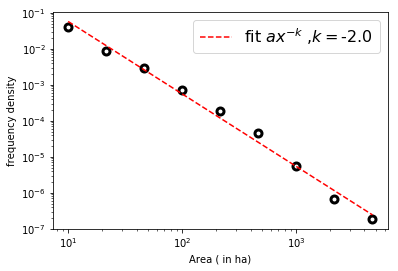

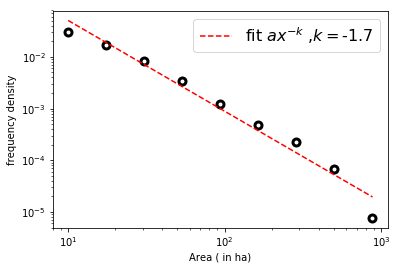

In [10]:
%matplotlib inline
d=fire["public_shrub_burnt"]
d=d[d>5]
h,b=histogram(d,bins=logspace(1,log10(max(d)),10),density=True)
plot(b[:-1],h,"wo",ms=7,mec="k",mew=3)
xlabel("Area ( in ha)")
ylabel("frequency density")
loglog()
fitting(b[:-1],h)
print("the number of  fires in public areas is "+str(len(d)))
figure()
e=fire["private_shrub_burnt"]
e=e[e>0]
h,b=histogram(e,bins=logspace(1,log10(max(e)),10),density=True)
plot(b[:-1],h,"wo",ms=7,mec="k",mew=3)
xlabel("Area ( in ha)")
ylabel("frequency density")
loglog()
fitting(b[:-1],h)
print("the number of  fires  in private areas is "+str(len(e)))

Distribution of the burned area  for  public and private forest fires.Only the fires that involves area larger than 5 ha are taken into account.  Please consider that the number of data in the 2 cases  is very different:

A= 3.50542593225 k= -1.89857414774
the number of  fires in public areas is 5626
A= 5.56015228864 k= -1.96596003938
the number of  fires  in private areas is 907


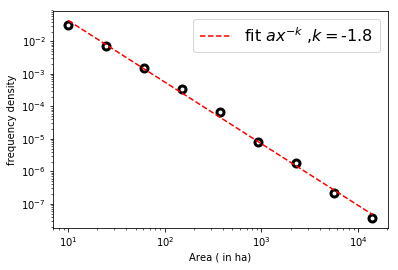

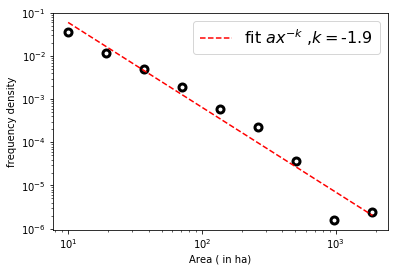

In [43]:
%matplotlib inline
d=fire["public_forest_burnt"]
d=d[d>5]
h,b=histogram(d,bins=logspace(1,log10(max(d)),10),density=True)
plot(b[:-1],h,"wo",ms=7,mec="k",mew=3)
xlabel("Area ( in ha)")
ylabel("frequency density")
loglog()
fitting(b[:-1],h)
print("the number of  fires in public areas is "+str(len(d)))
figure()
e=fire["private_forest_burnt"]
e=e[e>5]
h,b=histogram(e,bins=logspace(1,log10(max(e)),10),density=True)
plot(b[:-1],h,"wo",ms=7,mec="k",mew=3)
xlabel("Area ( in ha)")
ylabel("frequency density")
loglog()
fitting(b[:-1],h)
print("the number of  fires  in private areas is "+str(len(e)))

The same as before in agricultural areas

the number of  fires in agricultual areas is 470
A= 1.30809192962 k= -1.57756758067


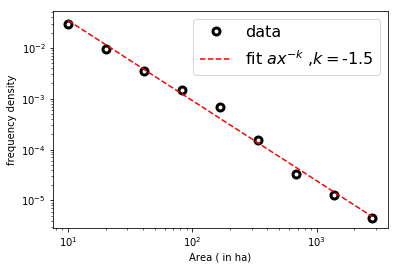

In [8]:
%matplotlib inline
d=fire["agricultural_burnt"]
d=d[d>5]
h,b=histogram(d,bins=logspace(1,log10(max(d)),10),density=True)
plot(b[:-1],h,"wo",ms=7,mec="k",mew=3,label="data")
xlabel("Area ( in ha)")
ylabel("frequency density")
#semilogx()
print("the number of  fires in agricultual areas is "+str(len(d)))
#k,a_log=polyfit(log(b[:-1]),log(h),1)
loglog()
fitting(b[:-1],h)



In [4]:
def func(x,a,k):
    return a*x**(-k)
from scipy.optimize import curve_fit
def fitting_nonlinear(x,y):
    popt, pcov = curve_fit(func,x,y)
    plot(x,func(x,*popt), 'r--', label='fit $ax^{-k}$ ,$k=$'+str(popt[1])[:4])
    #loglog()
    legend(fontsize=16)
    print(popt)
def fitting(x,y):
        k,a_log=polyfit(log(x),log(y),1)
        ybar=mean(log(y))
        yhat=a_log+k*log(x)
        ssreg = numpy.sum((yhat-ybar)**2)
        sstot = numpy.sum((log(y) - ybar)**2)
        plot(x,func(x,exp(a_log),-k),"r--", label='LS fit')
        print("A= "+str(exp(a_log))+" k= "+str(k))
        rsquared = ssreg / sstot
        return exp(a_log),k,rsquared

array([ 1.        ,  0.77426368,  0.59948425,  0.46415888,  0.35938137,
        0.27825594,  0.21544347,  0.16681005,  0.12915497,  0.1       ])

This is the total area 

In [30]:
import powerlaw
%matplotlib 
figure(figsize=(4,3))
f=fire["tot_burnt"]
x0=1
xmin=39
f=f[f>=x0]
def MLE(x,xmin):
    x=x[x>=xmin]
    return 1+len(x)*sum(log(x/(xmin)))**-1
def CDF(f):
    xlabel("Area ( in ha)")
    ylabel("CDF)")
    loglog()
    plot(sort(f[f<xmin]),len(f)-arange(0,len(f[f<xmin])),"m.")
    plot(sort(f[f>xmin]),len(f)-(len(f[f<=xmin])+arange(0,len(f[f>xmin]))),"b.")
    xlabel("Area $A_F$ (ha)",size=12)
    ylabel("Cumulative frequency, $F(A_F)$",size=12)
    intercept,alpha_ls,rsquared=fitting(sort(f[f>xmin]),len(f)-len(f[f<=xmin])-arange(0,len(f[f>xmin])))
    alpha=MLE(f,xmin)
    t=logspace(log10(min(f[f>xmin])),log10(max(f)),20)
    plot(t,len(f[f>=xmin])*((alpha-1)*xmin**(alpha-1))/(alpha-1)*t**(1-alpha),"-.",label="MLE fit")
    text(1,0.2,"LS: $F(A_F)="+str("%.2g"% intercept)+"A_F^{"+str(round(alpha_ls,2))+"}$, $r^2=$"+str(round(rsquared,2)))
    text(1,1,"MLE: $F(A_F)="+str("%.2g"% (len(f[f>xmin])*((alpha-1)*xmin**(alpha-1)/(alpha-1))))+"A_F^{"+str(round(1-alpha,2))+"}$ ")
    print( "cumulative parameters are"+str(round(((alpha-1)*x0**(alpha-1))/(alpha-1),2)))
    legend(fontsize=12)
    tight_layout()
    ylim(1e-1)
    print("rsquared cdf"+str(rsquared))
CDF(f)

def PDF(f):
    figure(figsize=(4,3))
    xlabel("Area ( in ha)")
    ylabel("PDF")
    h,b=histogram(f,bins=logspace(log10(min(f)),log10(max(f)+10),21),density=False)
    x=(b[:-1]+b[1:])/2.
    plot(x[x<xmin],h[x<xmin]/diff(b)[x<xmin],"wo",ms=6,mec="m",mew=2)
    plot(x[x>=xmin],h[x>=xmin]/diff(b)[x>=xmin],"wo",ms=6,mec="b",mew=2)
    xlabel("Area $A_F$ (ha)",size=12)
    ylabel("Non-cumulative frequency,\n $f(A_F)$ (ha)$^{-1}$ ",size=12)
    errorbar(x,h/diff(b),xerr=diff(b)/4,ls="None")
    #loglog()
    print("norm +"+str(sum((diff(b))*h)))
    alpha=MLE(f,xmin)
    plot(x[x>xmin],len(f[f>xmin])*((alpha-1)*xmin**(alpha-1))*x[x>xmin]**-alpha,"-.",label="MLE fit")
    intercept,alpha_ls,rsquared=fitting(x[x>xmin],h[x>xmin]/diff(b)[x>xmin])
    text(1,2e-5,"LS: $f(A_F)="+str("%.2g"% intercept)+"A_F^{"+str(round(alpha_ls,2))+"}$, $r^2=$"+str(round(rsquared,2)))
    text(1,5e-4,"MLE: $f(A_F)="+str("%.2g"%(len(f[f>xmin])*(alpha-1)/x0**(1-alpha)))+"A_F^{"+str(round(-alpha,2))+"}$")
    tight_layout()
    legend(fontsize=12.5)
    ylim(1e-5,175000)
    loglog()
    print("rsquared pdf"+str(rsquared))

PDF(f)    


fit=powerlaw.Fit(f,xmin=x0)

alpha=MLE(f,xmin)
#plot(f,(alpha-1)/(x0**(1-alpha))*f**(-alpha+1)/(alpha-1))

#plot(f,(alpha-1)/(x0**(1-alpha))*f**(-alpha))
     
#alpha=MLE(f,1000)


Using matplotlib backend: Qt5Agg
A= 279363.253957 k= -0.932843991334
cumulative parameters are1.0
rsquared cdf0.975990968927
norm +1615997.44454
A= 545738.857576 k= -2.0576455249
rsquared pdf0.990958535399


/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Make the CDF and extimate the recurrent event

In [127]:
def theoretical_extimate(fit):
    p= 1-0.99**25.8
    xmin=fit.xmin
    alpha=fit.alpha
    Ax=xmin*p**(1/(1-alpha))
    error=xmin*p**(1/(1-alpha))*log(p)*(1/(1-alpha)**2)*fit.sigma
    print(error)
    return  Ax
close("all")
figure(figsize=(4,3))
f=fire["tot_burnt"]
xmin=39
f=f[f>xmin]
#plot(sort(f),1-arange(0,len(f))/len(f),"m.")
fit=powerlaw.Fit(f,xmin=xmin)
alpha=fit.alpha
t=logspace(log10(min(f)),log10(max(f)))
plot(t,(t/39)**(1-alpha),label="model")
loglog()
axhline(1-0.99**25.8,ls="--",c="r")
axvline( theoretical_extimate(fit) ,ls="--",c="r")
#legend()
xlabel("Total area burnt, $A_f$ (ha)",fontsize=12.5)
ylabel("CDF, $A_F$",fontsize=12.5)
tight_layout()
text(theoretical_extimate(fit)+30,6e-3,"$A_{100}=$ "+str(round(theoretical_extimate(fit),))+" ha",color="r")
text(3e3,1-0.99**25.8+.03 ,"$CDF=$ "+str(round(1-0.99**25.8,3)),color="r")



-4.68856883071
-4.68856883071
-4.68856883071


In [123]:
theoretical_extimate(fit)

-4.68856883071


234.20926883917423

In [19]:
logspace(log10(min(f)),log10(max(f)),10)

array([  5.00100000e+00,   1.34173011e+01,   3.59975941e+01,
         9.65787960e+01,   2.59113534e+02,   6.95181823e+02,
         1.86511974e+03,   5.00397383e+03,   1.34252796e+04,
         3.60190000e+04])

In [39]:
a=fire["tot_burnt"]
y=[MLE(a,i) for i in arange(1,1e4)]


In [26]:
def area_over_time():
    area=fire["tot_burnt"]
    ign=fire["ignition_date"]
    cond=(area>1000)&(ign>0)
    area=area[cond]
    ign=ign[cond]
    y=from_days_to_date(ign,"month")
    h,b=histogram(y,bins=arange(1,14),density=True)
    plot(b[:-1],h,"wo",ms=7,mec="k",mew=3)
    ylabel("Frequency density of fires")
    xlabel("Month")
    figure()
    '''title("area")
    hist(y,bins=arange(1,14),weights=area)'''
    y=from_days_to_date(ign,"year")
    h,b=histogram(y,bins=arange(min(y),max(y)+2,5),density=True)
    plot(b[:-1],h,"-o",ms=7,mec="k",mew=3)
    ylabel("Frequency density of fires")
    xlabel("Year")
def from_days_to_date(b,feature="month"):
    if feature=="day":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).day for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    elif feature=="month":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).month for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    elif feature=="year":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).year for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    else:
        raise NameError("accepted features are: days, month or year")

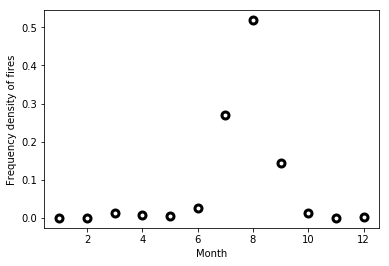

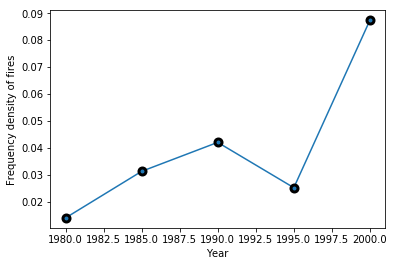

In [28]:
%matplotlib inline
area_over_time()

In [27]:
histogram?

In [7]:
arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])